<a href="https://colab.research.google.com/github/Pawan-kumar-Singh/Airbnb-data-analysis/blob/main/Copy_of_Copy_of_Copy_of_Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## Importing important libraries

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

import datetime as dt

## Mounte the drive and import the data set

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the dataset

In [232]:
df = pd.read_csv('/content/drive/MyDrive/Bike Sharing Demand Prediction-20220721T084129Z-001/Bike Sharing Demand Prediction/Data _ Resources/SeoulBikeData.csv', encoding = 'latin')

DataFrame - head() function
The head() function is used to get the first n rows. This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it. Number of rows to select.

In [233]:
df.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


DataFrame - tail() function

The tail() function is used to get the last n rows. This function returns last n rows from the object based on position. It is useful for quickly verifying data.

In [234]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


The shape of a DataFrame is a tuple of array dimensions that tells the number of rows and columns of a given DataFrame.

In [235]:
df.shape


(8760, 14)

There are 8760 rows and 14 columns

The describe() method returns description of the data in the DataFrame.

If the DataFrame contains numerical data, the description contains these information for each column:

count - The number of not-empty values.
mean - The average (mean) value.
std - The standard deviation.
min - the minimum value.
25% - The 25% percentile*.
50% - The 50% percentile*.
75% - The 75% percentile*.
max - the maximum value.

*Percentile meaning: how many of the values are less than the given percentile. 

In [236]:
#Statistical Information
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Maximum number of renetd bike count is 3356

Pandas DataFrame info() Method
The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values). Note: the info() method actually prints the info.

In [237]:
#Datatype Inforamtion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

1. The dataset does not have any null value, has 8760 rows and 14 columns.
2. Year, Month, Date can be extracted from Date.
3. Numeric columns are Date,Rented Bike Count, Hour, Temperature, Humidity, Wind Speed, Visibility, Dew point temperature, Rainfall, Snowfall.
4. Categorical Columns are Seasons,Functioning Day, Holiday.

In [238]:
#unique values
df.apply(lambda x: len(x.unique()))

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [239]:
#Preprocessing the dataset
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

We can see there is no null values

In [240]:
#Rename the complex columns name
df=df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [241]:
# Changing the "Date" column into three column "year","month","day" 
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [242]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented_Bike_Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind_speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew_point_temperature  8760 non-null   float64       
 8   Solar_Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [244]:
#creating a new column of "weekdays_weekend" and drop the column "Date","year"
df['weekdays_weekend']=df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
#df=df.drop(columns=['Date','year'],axis=1)

In [245]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,year,month,day,weekdays_weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,0


In [246]:
#Change the int64 column into catagory column
cols=['Hour','month','day','weekdays_weekend']
for col in cols:
  df[col]=df[col].astype('category')

In [247]:
#let's check the result of data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented_Bike_Count      8760 non-null   int64         
 2   Hour                   8760 non-null   category      
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind_speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew_point_temperature  8760 non-null   float64       
 8   Solar_Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

[Text(0.5, 1.0, 'Count of Bike during weekdays and weekends')]

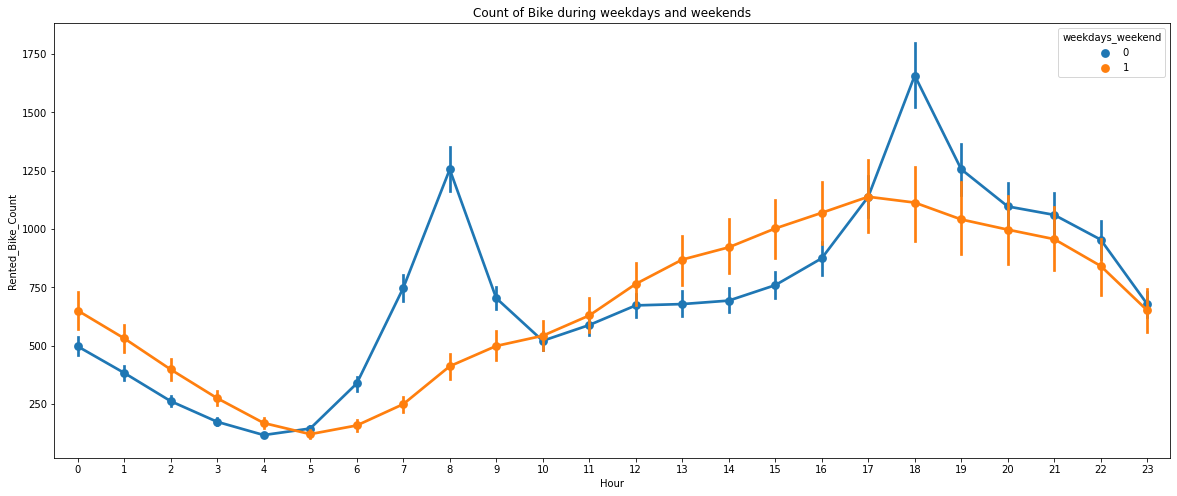

In [248]:
fig, ax = plt.subplots(figsize=(20,8))
sns.pointplot(data=df, x='Hour',y='Rented_Bike_Count', hue='weekdays_weekend', ax=ax)
ax.set(title='Count of Bike during weekdays and weekends')

[Text(0.5, 1.0, 'Count of Bike during weekdays and weekends')]

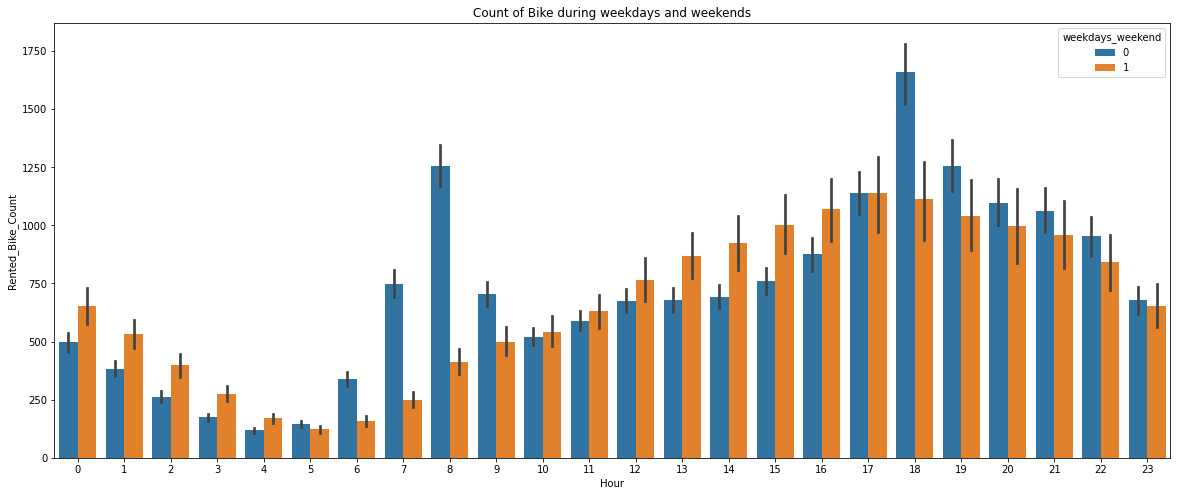

In [249]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=df, x='Hour',y='Rented_Bike_Count', hue='weekdays_weekend', ax=ax)
ax.set(title='Count of Bike during weekdays and weekends')

Here we can see in the morning 5 am its taking the peak till 8 am then its goes down to 10 am it means people who  used to go for office, college or some institute uses the bike more on working days.

again in between 4 pm to 7pm we are getting hike then its start going down it mean office and institute closing time .

On saturday on sunday we can see any peak in the moring but we can see in the evening because in the evenig people go out on weekend.

[Text(0.5, 1.0, 'Count of Bike during Different Seasons')]

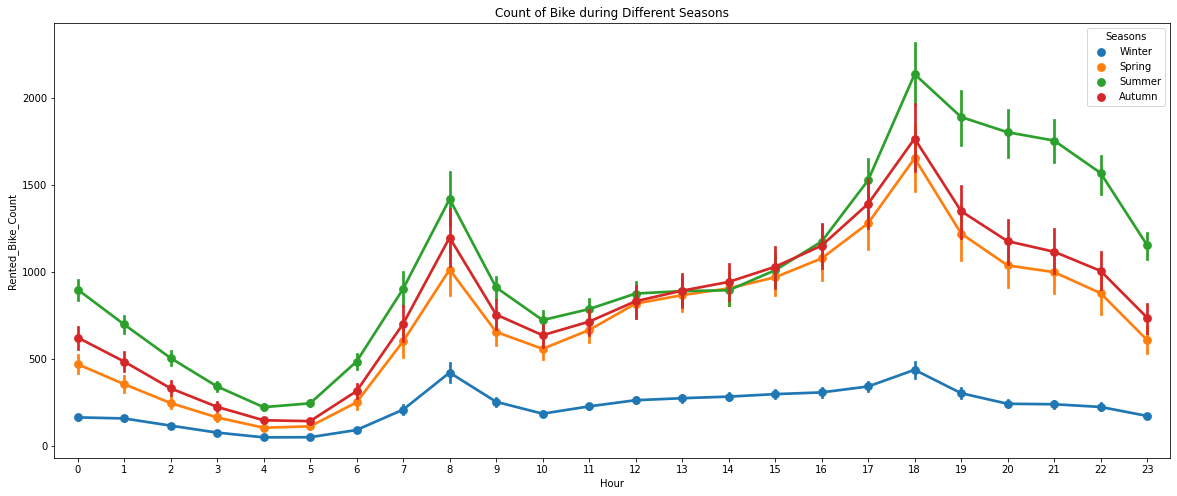

In [250]:
fig, ax = plt.subplots(figsize=(20,8))
sns.pointplot(data=df, x='Hour',y='Rented_Bike_Count', hue='Seasons', ax=ax)
ax.set(title='Count of Bike during Different Seasons')

[Text(0.5, 1.0, 'Count of Bike during Different Seasons')]

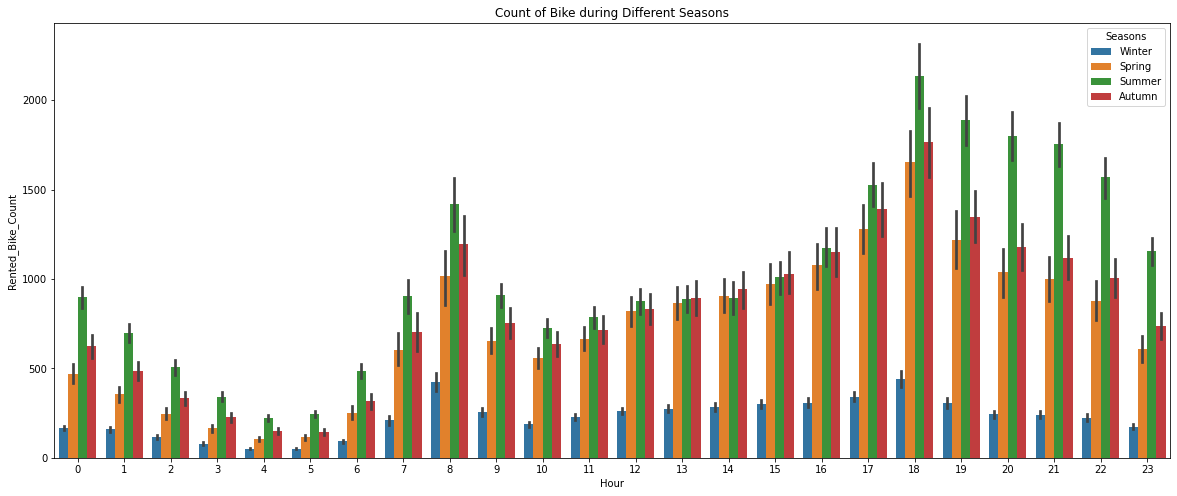

In [251]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=df, x='Hour',y='Rented_Bike_Count', hue='Seasons', ax=ax)
ax.set(title='Count of Bike during Different Seasons')

People are most likely to rent shared bikes in summar and least likely to rent in winter.

[Text(0.5, 1.0, 'Count of Bike during Different Seasons')]

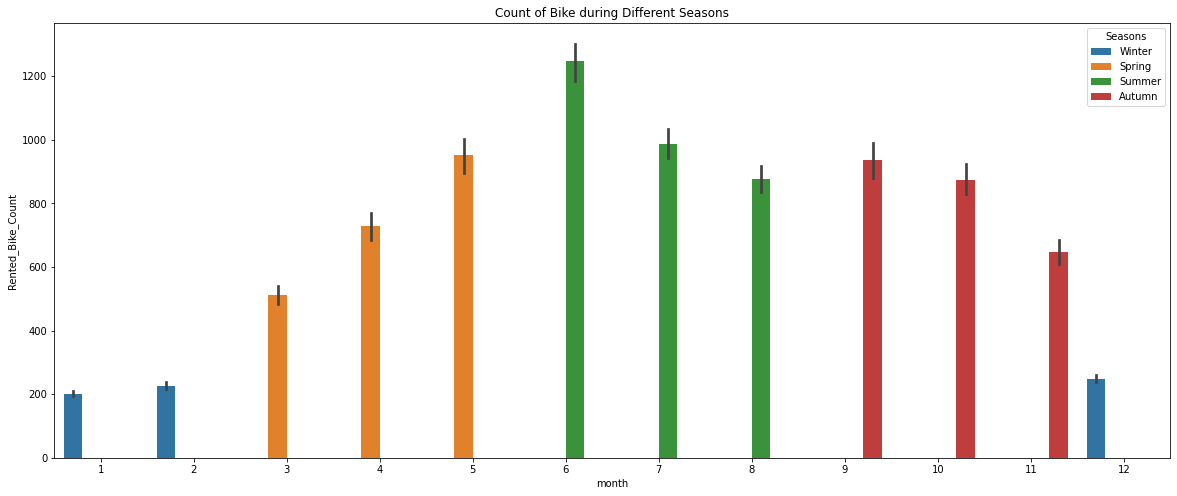

In [252]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=df, x='month',y='Rented_Bike_Count', hue='Seasons', ax=ax,)
ax.set(title='Count of Bike during Different Seasons')

[Text(0.5, 1.0, 'Count of bike during different months')]

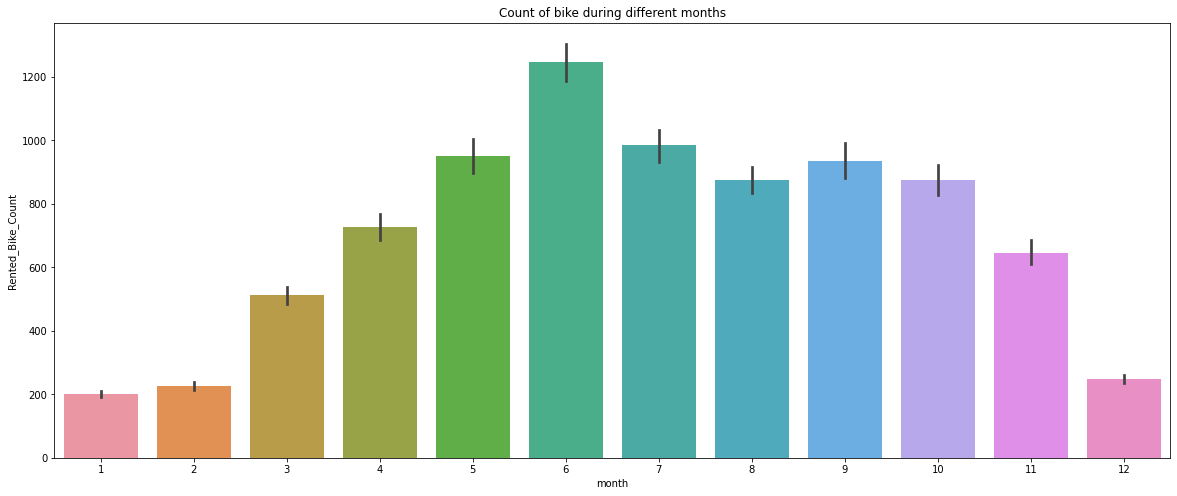

In [253]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data=df, x='month',y='Rented_Bike_Count', ax=ax)
ax.set(title='Count of bike during different months')

Here we can see the uniform distribution . In the month of jan, feb, nov, and dec we cans see there is very less no of people are renting bike may be because of winter and could weather. 

[Text(0.5, 1.0, 'Count of bikes during different days')]

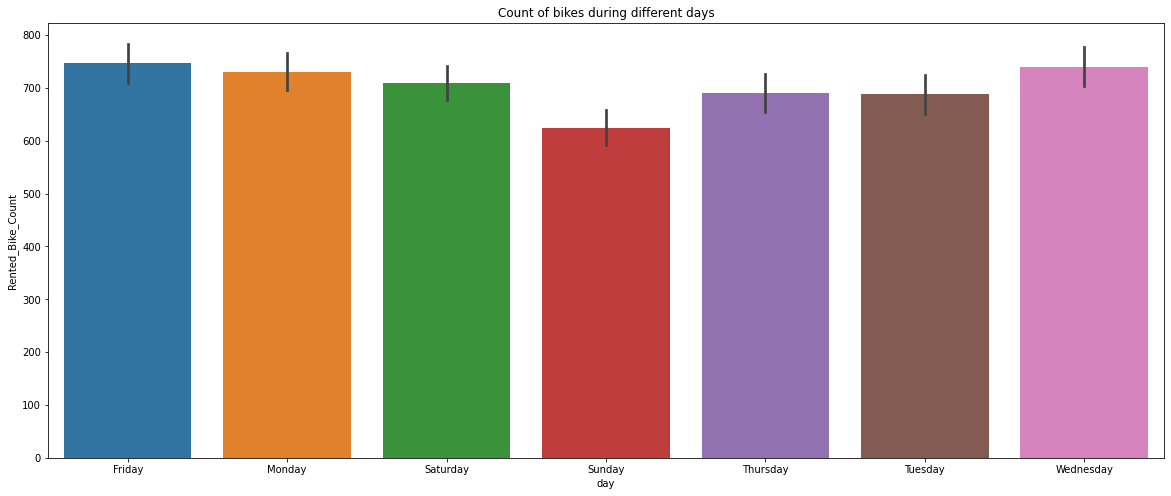

In [254]:
fig, ax= plt.subplots(figsize=(20,8))
sns.barplot(data=df, x='day', y='Rented_Bike_Count', ax=ax)
ax.set(title='Count of bikes during different days')

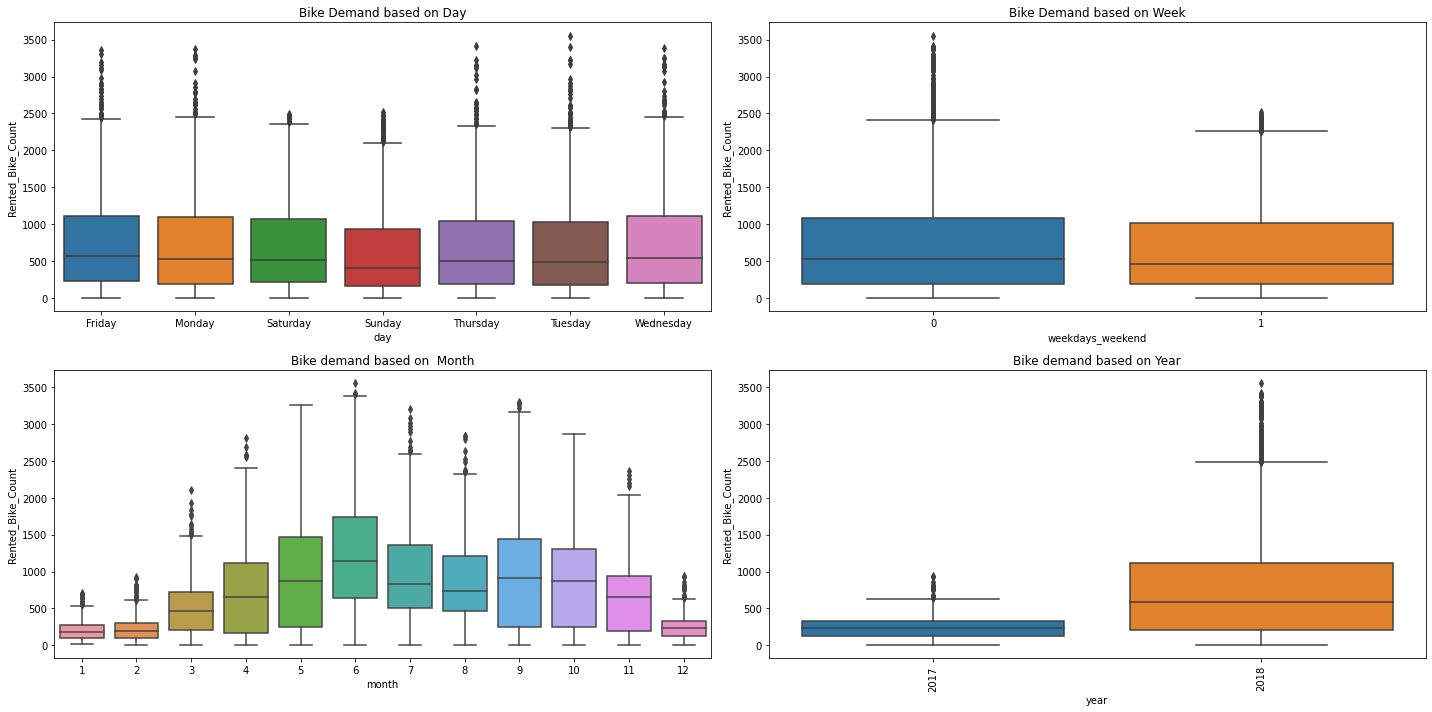

In [255]:
from matplotlib import figure
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(2, 2, 1, title="Bike Demand based on Day")
ax2 = fig.add_subplot(2, 2, 2, title="Bike Demand based on Week")
ax3 = fig.add_subplot(2, 2, 3, title="Bike demand based on  Month")
ax4 = fig.add_subplot(2, 2, 4, title="Bike demand based on Year")

sns.boxplot(df['day'], df['Rented_Bike_Count'], ax=ax1)
sns.boxplot(df['weekdays_weekend'], df['Rented_Bike_Count'], ax=ax2)
sns.boxplot(df['month'],df['Rented_Bike_Count'], ax=ax3)
sns.boxplot(df['year'], df['Rented_Bike_Count'], ax=ax4)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

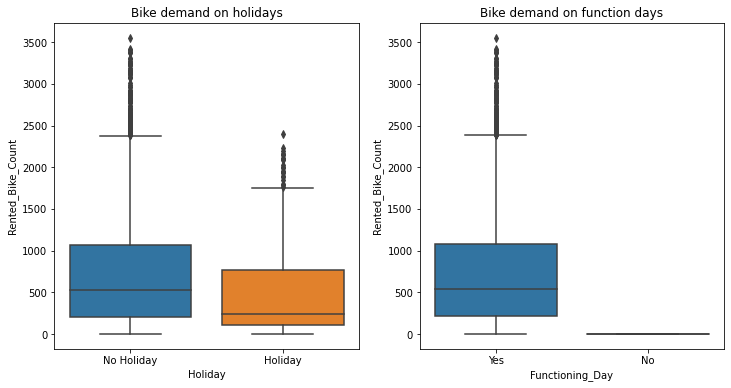

In [256]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Bike demand on holidays")
ax2 = fig.add_subplot(1, 2, 2, title="Bike demand on function days")

sns.boxplot(df['Holiday'], df['Rented_Bike_Count'], ax=ax1)
sns.boxplot(df['Functioning_Day'], df['Rented_Bike_Count'],ax=ax2)
plt.show()

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented_Bike_Count      8760 non-null   int64         
 2   Hour                   8760 non-null   category      
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind_speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew_point_temperature  8760 non-null   float64       
 8   Solar_Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

Analysingthe numerical variable

In [258]:
numerical_columns = list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'year'],
      dtype='object')

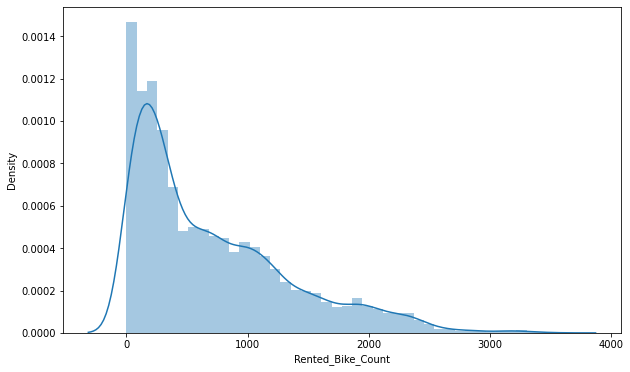

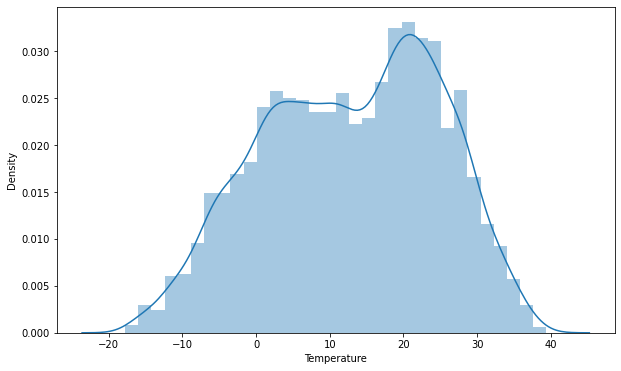

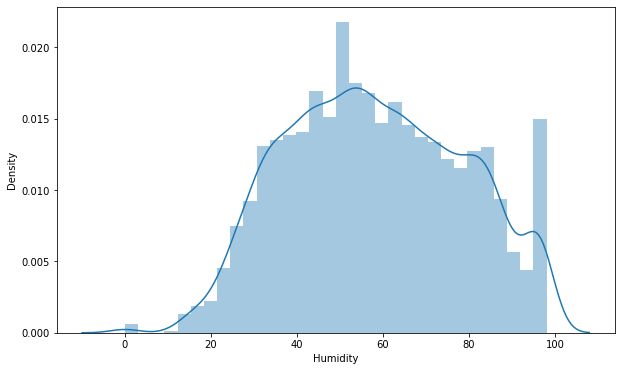

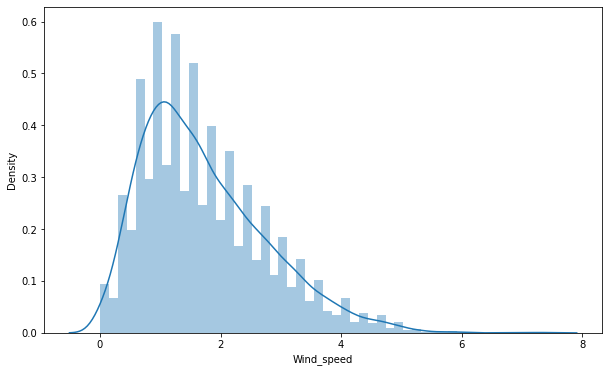

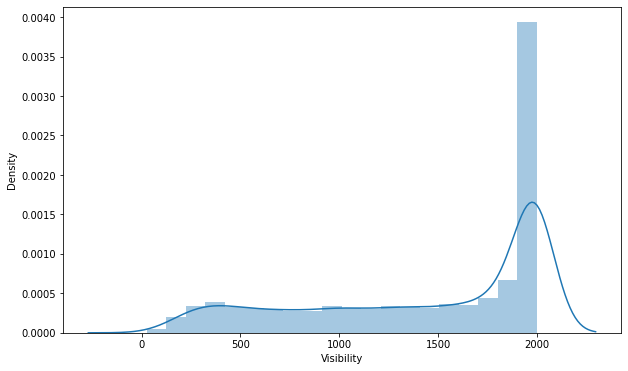

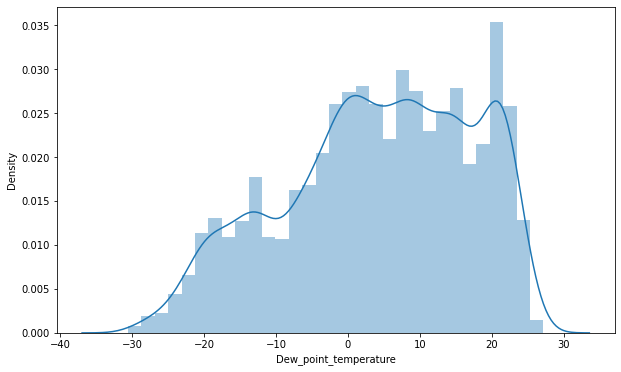

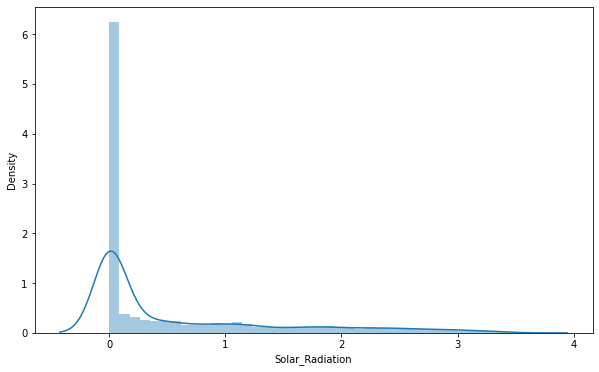

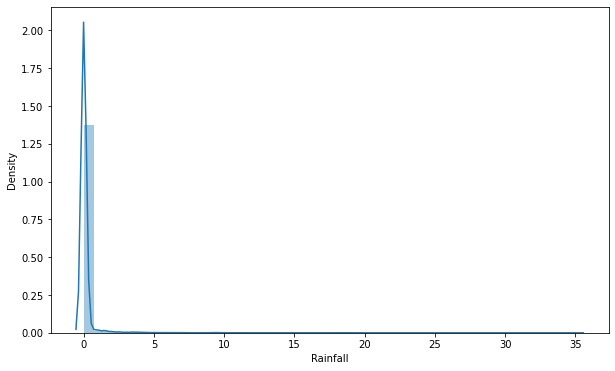

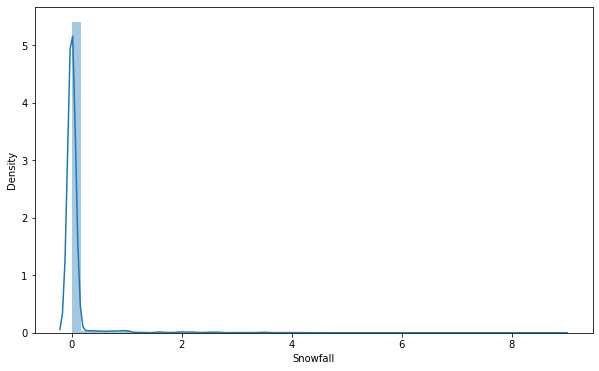

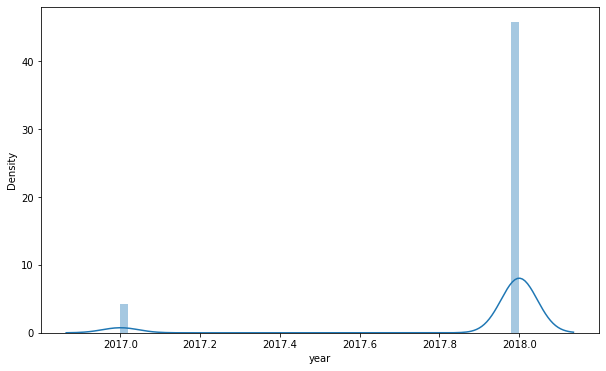

In [259]:
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=df[col])
  plt.xlabel(col)
plt.show()

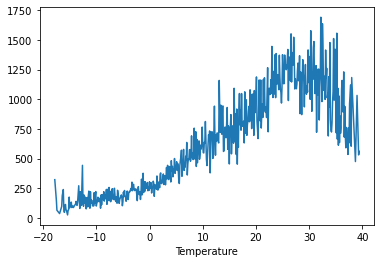

In [260]:
#print the plot to analyze the relationship between "Rented_bike_count" and temperature

df.groupby("Temperature").mean()['Rented_Bike_Count'].plot()

From the above plot we can the people like to ride bike when it is pretty hot around 30*c to 35*c in average

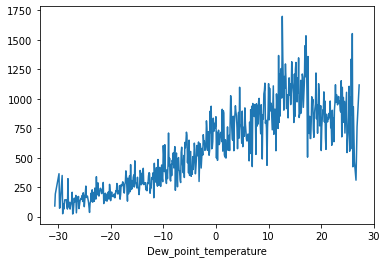

In [261]:
df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()

From the plot of Dew Point Temperature is almost same as the temperature there is some similarity present we can check it in or nexr step.

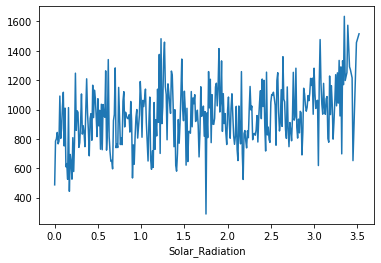

In [262]:
df.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()

from the above analysis plot we can see that, the amount of rented bike count is huge, when there is solar radiation, the counter of rents is around 1000

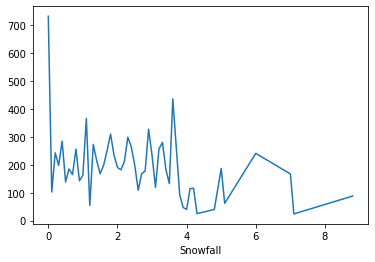

In [263]:
df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()

Wecan see from the plot, on the Y axis, the amount of rented bike count is very low When we have more than 4 cm of snow, the bike rents is much lower

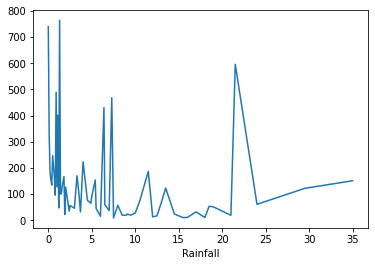

In [264]:
df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

We can see from the above plot that if it rains a lot the demand of rent bike count is not decreasing, here for example even if we have 20 mm of rain there is a big pick up rented bikes

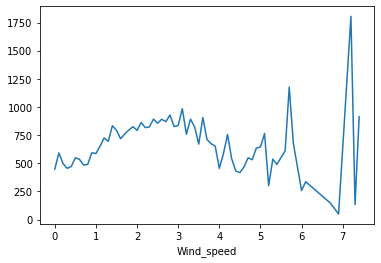

In [265]:
df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

We can see from the above plot the demand of rented bike count is uniformly distributed despite of wind speed but when the speed of wind is 7m/s then the demand of bike also increase that clearly means people love to ride bike when its little windy.

Regression plot in seaborn are primarily intended to add a visual guide that helps to emphasize in a dataset during exploratory data analysis. Regression plots as the name suggest creates a reggression line between 2 parameters and helps to visualize there linear realtionships.

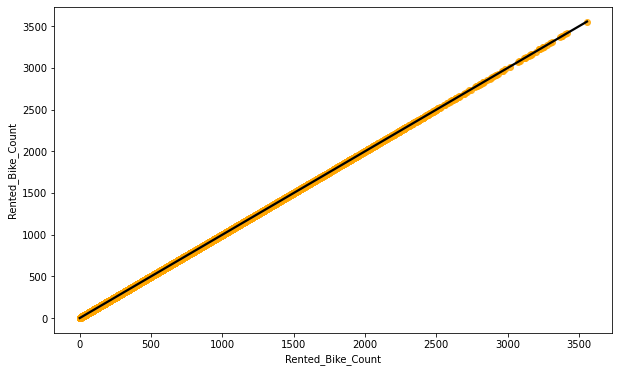

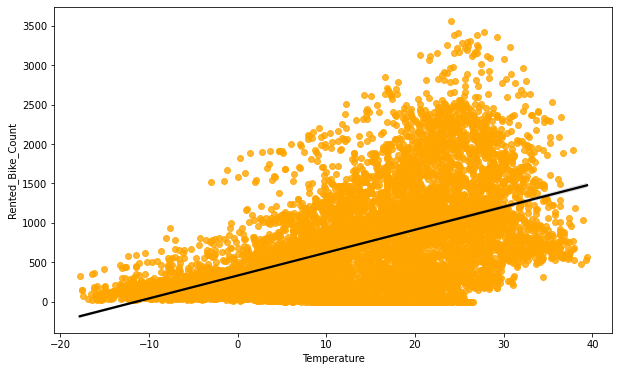

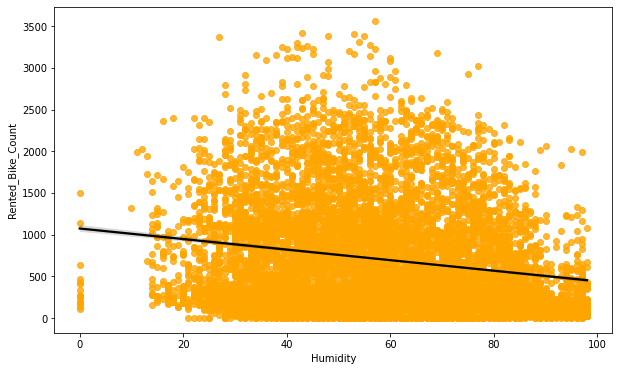

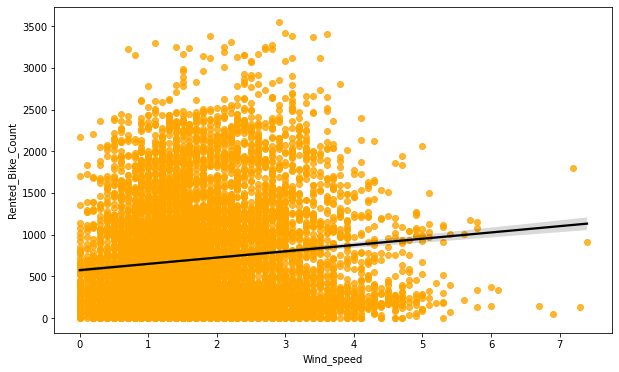

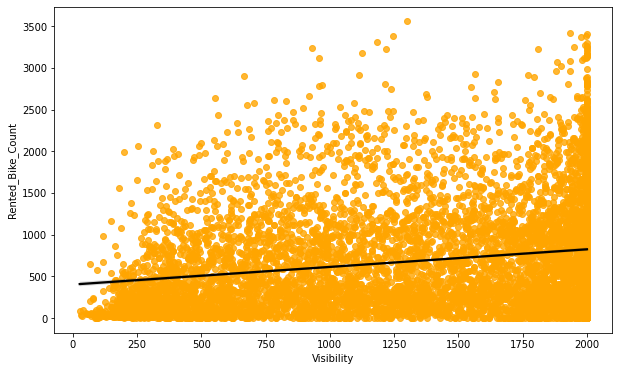

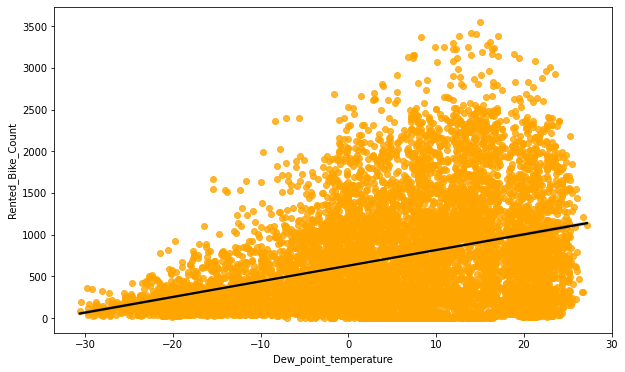

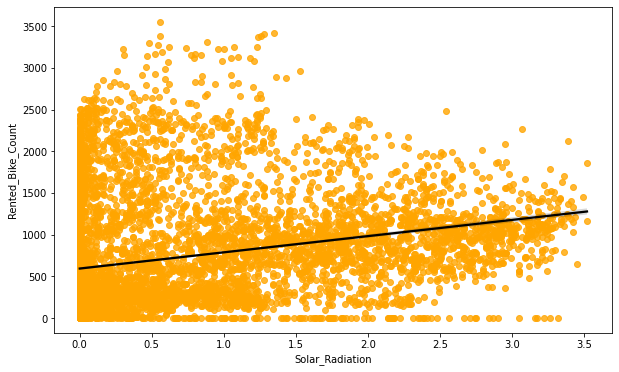

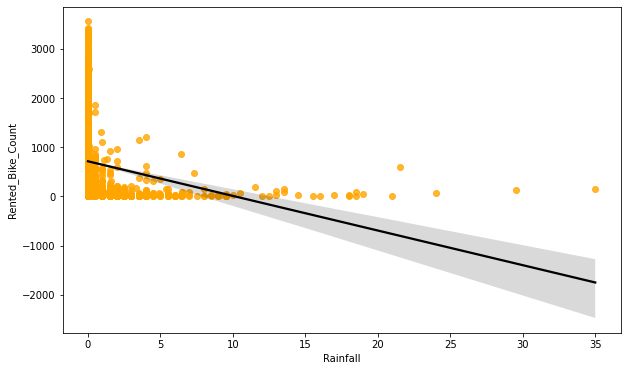

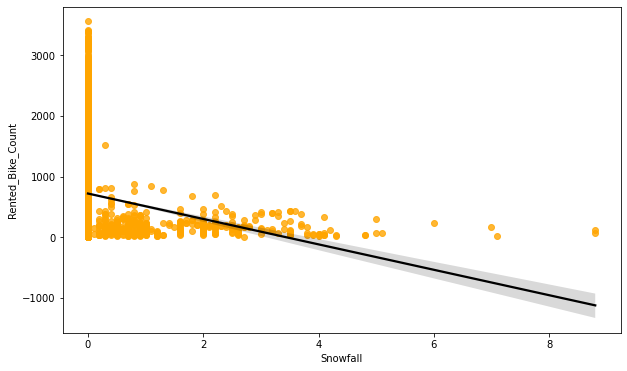

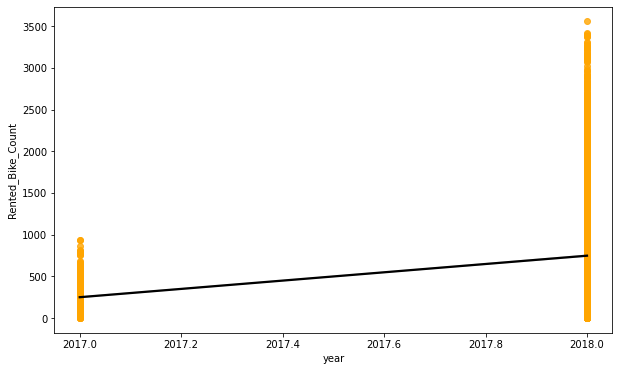

In [266]:
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented_Bike_Count'],scatter_kws={'color':'orange'},line_kws={"color":"black"})

From the above regression plot of all numerical features we can see that the columns Temperatures, wind speed, visibility, dew point temperature, solar radiation are positively ralated to the target variables.

Which means the rented bike count incrreases with increasing these features.

Rainfall, snowfall, humidity these features are negatively related with the target variables which mean the rented bike count  decreases when these features increses.

Normalise Rented bike count data

The data normalization( also referred to as data pre-processing) is a basic element of data mining.It mean transfering the data, namely converting the source data in to another format that allow processing the data effectively. The main purpose of normalization is to minimize or even exclude duplicated data

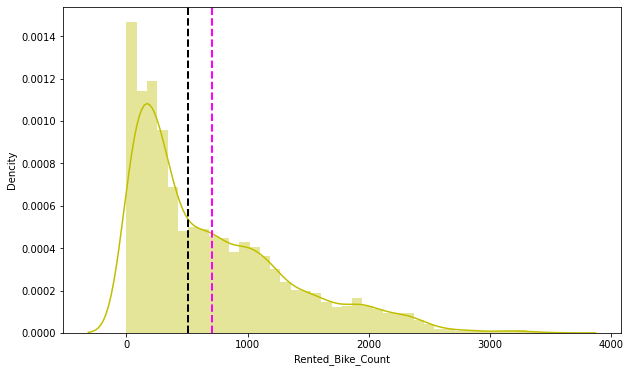

In [267]:
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Dencity')
ax=sns.distplot(df['Rented_Bike_Count'],hist=True, color="y")
ax.axvline(df['Rented_Bike_Count'].mean(),color='magenta',linestyle='dashed',linewidth=2)
ax.axvline(df['Rented_Bike_Count'].median(),color='black', linestyle='dashed', linewidth=2)
plt.show()

The above graph show that the Rented bike counts has moderate right skewness.Since the assumption of liner regression is that the distribution of dependent variables has to be normal, so we should perform some operation to make it normal.

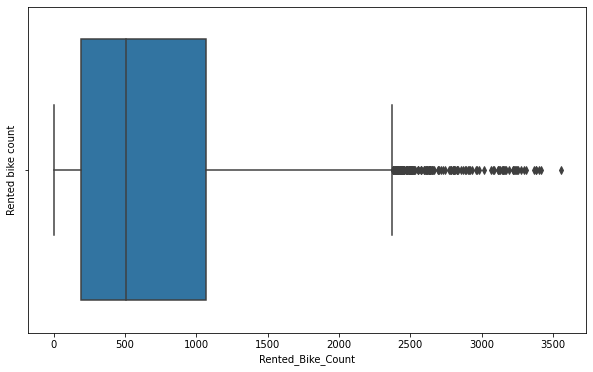

In [268]:
plt.figure(figsize=(10,6))
plt.ylabel('Rented bike count')
sns.boxplot(x=df['Rented_Bike_Count'])
plt.show()

The above boxplot shows that we have detect outliers in Rented Bike Count coloumn

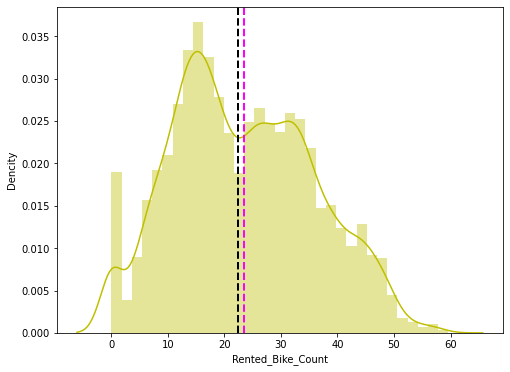

In [269]:
#applying the square root to Rented bike count to improve skewness
plt.figure(figsize=(8,6))
plt.xlabel('Rented bike count')
plt.ylabel('Dencity')

ax=sns.distplot(np.sqrt(df['Rented_Bike_Count']),color='y')
ax.axvline(np.sqrt(df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

Since we have generic rule of applying Square root for the skewed variable in order to make it normal. After applying Squre root to the skewed Rented Bike Count, here we get almost normal distribution.

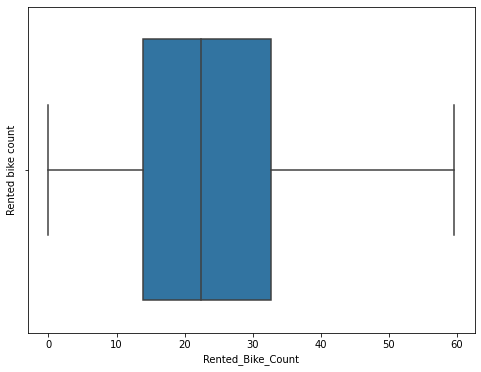

In [270]:
#After applyinh the squae root on Rented bike count lets see the outliers
plt.figure(figsize=(8,6))

plt.ylabel('Rented bike count')
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']))
plt.show()

In [271]:
df.corr()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,year
Rented_Bike_Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,0.215162
Temperature,0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,0.377796
Humidity,-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,0.035925
Wind_speed,0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-0.003781
Visibility,0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,0.052381
Dew_point_temperature,0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,0.336350
Solar_Radiation,0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,0.128086
Rainfall,-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,0.027522
Snowfall,-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,-0.206418
year,0.215162,0.377796,0.035925,-0.003781,0.052381,0.336350,0.128086,0.027522,-0.206418,1.000000


Checking of correlation between variables
Checking on OLS model
Ordinary least square(OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variables


In [272]:
#importint the model
#assign the x and y value

import statsmodels.api as sm
X=df[['Temperature','Humidity','Wind_speed','Visibility','Dew_point_temperature','Solar_Radiation','Rainfall','Snowfall']]
Y=df[['Rented_Bike_Count']]
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,year,month,day,weekdays_weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,0


In [273]:
X=sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [274]:
#fit the ordinary least square model
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     723.1
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        07:26:47   Log-Likelihood:                -66877.
No. Observations:                8760   AIC:                         1.338e+05
Df Residuals:                    8751   BIC:                         1.338e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   844.6495    106.296      7.946      0.000     636.285    1053.014
Temperature              36.5270      4.169      8.762      0.000      28.355      44.699
Humidity                -10.5077      1.184     -8.872      0.000     -12.829      -8.186
Wind_speed               52.4810      5.661      9.271      0.000      41.385      63.577
Visibility               -0.0097      0.011     -0.886      0.376      -0.031       0.012
Dew_point_temperature    -0.7829      4.402     -0.178      0.859      -9.411       7.846
Solar_Radiation        -118.9772      8.670    -13.724      0.000    -135.971    -101.983
Rainfall                -50.7083      4.932    -10.282      0.000     -60.376     -41.041
Snowfall                 41.0307     12.806      3.204      0.001      15.929      66.133
==============================================================================
Omnibus:                      957.371   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1591.019
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       4.412   Cond. No.                     3.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R square and Adj Square are near to each oher. 40% of variance in the Rented Bike count is explained by the model.

For F statistic, P value is less than 0.05 for 5% level of significant.
 P value of dew point temp and visibility are very high and they are not significant.

 Omnibus tests the skewness and kurtosis of the residuals.Here the value of Omnibus is high, it shows we have skewness in our data.

 The condition numbers is large, 3.11e+4. This mightindicate that there are multicollinearity or otherr numerical problems
 Durbin_watson tests for autocorrelation of the residuals.Here value is less than 0.5. We can say that there exists a positive auto correlation tha variables

In [275]:
X.corr()

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,NaN,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,NaN,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,NaN,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,NaN,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,NaN,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,NaN,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,NaN,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


From the OLS model we find that the Temperature and Dew Point temp is highly correlated so we need to drop one og them.
for droping we can check the (p>|t|) value from above table and we can see the Dew Point temperature value is hight so we need to drop dew point temperature coloumn
for clearity we will use visualisation i.e heatmap in next step.

Heatmap

We check correlation between variables using Correlation heatmap,it is graphical representation of correalation matrix representing correlation between diffrent variables.

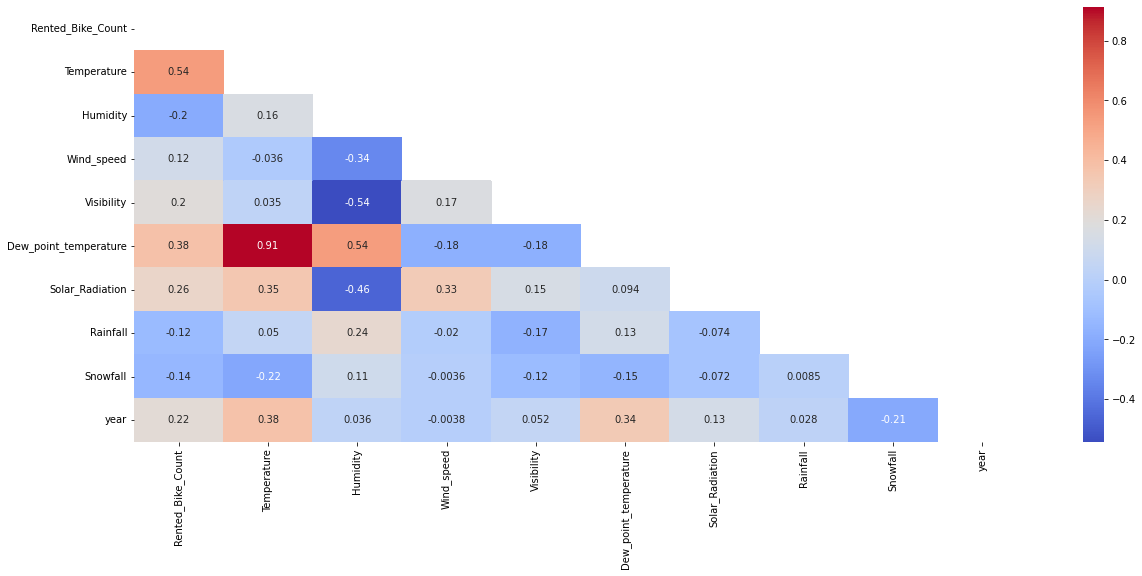

In [276]:
#plot the correlation matrix
plt.figure(figsize=(20,8))
correlation=df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True, cmap='coolwarm')

We can observe on the heatmap that on the target variable line the most positively correlation variables are:
temperature
dew poit temp
solar radiation

And the most negatively coorealtion variable are:

Humidity
Rainfall

From the above correlation heatmap, we see that there is positive correlation between columns Temperature and dew point temp i.e 0.91 so even if we drop this column than it dosnt affects the outcomes of our analysis. And they have variations.
so we can drop the column dew point temperature.

In [277]:
df=df.drop(['Dew_point_temperature','Date','Seasons','Functioning_Day','Holiday','day'],axis=1)

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   year               8760 non-null   int64   
 10  month              8760 non-null   category
 11  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(4)
memory usage: 643.0 KB


Creating dummy variables

A dataset may contain various type of values, sometimes it consists of categorical values. So in order to use those categorical value for programming efficiently we create variables.

In [279]:
#Assign all catagorical features to a variables
categorical_features=list(df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'month', 'weekdays_weekend'], dtype='object')

On hot encoding

A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithm cannt work with categorical data directly. The categoricacl must be converted into numbers. This is required for both input and output variables that are categorical.

In [280]:
df_copy = df

def one_hot_encoding(data, column):
  data=pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
  data= data.drop([column], axis=1)
  return data

for col in categorical_features:
  df=one_hot_encoding(df_copy, col)
df_copy.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,year,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,2017,12,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,2017,12,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,2017,12,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,2017,12,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,2017,12,0


Model Training

Before fitting any model it is a rule  of thumb to split the dataset into a training and test set. This mean some portion of the data will go into training the model and some data portion will be used to evaluate how our model is performing on any unseen data. The portions may vary from 60:40,70:30,75:25 depending on the person but mostly used is 80:20 for training and testing respectively.
In this step we will split our data into training and testing set using scikit learn library.

In [281]:
#Assign the value in x and y
X=df_copy.drop(columns=['Rented_Bike_Count',],axis=1)
y=np.sqrt(df_copy['Rented_Bike_Count'])

In [282]:
X.head()

,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,year,month,weekdays_weekend
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,2017,12,0
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,2017,12,0
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,2017,12,0
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,2017,12,0
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,2017,12,0


In [283]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [284]:
#Create train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)



(6570, 11)
(2190, 11)


In [285]:
df_copy.describe().columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'year'],
      dtype='object')

The mean squared error(MSE) tells  you how close a regression line is to a set of points. It doses this by taking the distance from the points to thhe regression line( these distance are the error ) and squaring them. Its called the mean squared error as you are finding the average of a set or error. This lower the MSE, the better the forecast.

MSE formula = (1/n)*E(actual-forecast)^2 where
n = number of items,
E = summation notation
Actual = original or observed Y- value
Forecast = y-value from regression
Root Mean Square Error(RMSE) is the standard deviation of the residuals(prediction error)
Mean Absolute Error(MAE) are metrics used to evaluate a Regression Model.
Here error are the different between the predicted values(values predicted by our regression model) and the actual values of a variables.
R-squared (R2) is a statical measure that represent the proportion of the variance for a dependent variable that explained by an independent variables or variables in aregression model.

Formula fro R squared

R^2 = 1-Unexplained Variance/Total VAriation

R2 = 1-Total Variation Unexpected Variation

Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.

Linear Regression

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line

Linear regression uses a linear approach to model the relationship between independent and dependent variables.In case of single variables, the fromula is same as straight line equation having an intercept and slop.

y_pred = B0+B1x

where Bo abd B1 are intercept adn slope respectively.
In case of multiple features the formula translates into:

y_pred =B0+B1x1+B2x2+B3x3+.....

where x1,x2,x3 are features variables

In [286]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)

In [289]:
reg.score(X_train, y_train)

0.487581274223569

In [290]:
reg.coef_

array([ 4.94342208e-01,  5.45618502e-01, -1.55323731e-01,  2.92589276e-02,
       -1.75760837e-04, -7.87702319e-01, -1.49443495e+00, -6.32057309e-02,
        3.46810797e+00,  3.32082890e-01, -1.00587423e+00])

In [291]:
#get the X_train and X_test values
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [292]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr=mean_squared_error((y_train),(y_pred_train))
print("MSE :", MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :", RMSE_lr)

#calculate MAE
MAE_lr = mean_squared_error(y_train,y_pred_train)
print("MAE :", MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr = r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 78.90770741153379
RMSE : 8.883001036335287
MAE : 78.90770741153379
R2 : 0.487581274223569
Adjusted R2 : 0.48499330086106185


In [294]:
#storing the test set metrics value in a dataframe for later comparison
dict1={
    'Model':'Linear regression',
    'MAE':round((MAE_lr),3),
    'MSE':round((MSE_lr),3),
    'RMSE':round((RMSE_lr),3),
    'R2_score':round((r2_lr),3),
    'Adjusted R2':round((Adjusted_R2_lr),2)
}
training_df=pd.DataFrame(dict1,index=[1])

In [297]:
#import the package
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
#Calculate MSE
MSE_lr = mean_squared_error(y_test, y_pred_test)
print("MSE :", MSE_lr)

#calcuated RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

#calculated MAE
MAE_lr = mean_absolute_error(y_test,y_pred_test)
print("MAE :",MAE_lr)

#import the package

from sklearn.metrics import r2_score
#calculated r2 and  adjusted r2
r2_lr = r2_score((y_test),(y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test),(y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr)

MSE : 84.53932088652203
RMSE : 9.194526680940244
MAE : 6.698216630466349
R2 : 0.46482720948032863
Adjusted R2 : -116.14932384475607


In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Rented_Bike_Count   8760 non-null   int64   
 1   Hour                8760 non-null   category
 2   Temperature         8760 non-null   float64 
 3   Humidity            8760 non-null   int64   
 4   Wind_speed          8760 non-null   float64 
 5   Visibility          8760 non-null   int64   
 6   Solar_Radiation     8760 non-null   float64 
 7   Rainfall            8760 non-null   float64 
 8   Snowfall            8760 non-null   float64 
 9   year                8760 non-null   int64   
 10  month               8760 non-null   category
 11  weekdays_weekend_1  8760 non-null   uint8   
dtypes: category(2), float64(5), int64(4), uint8(1)
memory usage: 642.8 KB


In [288]:
numerical_columns

['Rented_Bike_Count',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall',
 'year']